In [3]:
# Assignment 1
# Freddie Vasquez-Rios
# 801170633

# PART 1.b
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#
df = pd.read_csv('./D3.csv')
df.head(100)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


In [5]:
dataset = df.values[:,:]
print(dataset[:20,:])

[[0.         3.44       0.44       4.38754501]
 [0.04040404 0.1349495  0.88848485 2.6796499 ]
 [0.08080808 0.82989899 1.3369697  2.96848981]
 [0.12121212 1.52484848 1.78545454 3.25406475]
 [0.16161616 2.21979798 2.23393939 3.53637472]
 [0.2020202  2.91474747 2.68242424 3.81541972]
 [0.24242424 3.60969697 3.13090909 4.09119974]
 [0.28282828 0.30464646 3.57939394 2.36371479]
 [0.32323232 0.99959596 0.02787879 3.83296487]
 [0.36363636 1.69454546 0.47636364 4.09894997]
 [0.4040404  2.38949495 0.92484849 4.3616701 ]
 [0.44444444 3.08444444 1.37333333 4.62112526]
 [0.48484848 3.77939394 1.82181818 4.87731544]
 [0.52525252 0.47434343 2.27030303 3.13024065]
 [0.56565657 1.16929293 2.71878788 3.37990089]
 [0.60606061 1.86424242 3.16727273 3.62629616]
 [0.64646465 2.55919192 3.61575758 3.86942645]
 [0.68686869 3.25414141 0.06424242 5.30929177]
 [0.72727273 3.94909091 0.51272727 5.54589212]
 [0.76767677 0.6440404  0.96121212 3.77922749]]


In [6]:
X = df.values[:,1]
Y = df.values[:,3]
len(X), len(Y)

(100, 100)

In [7]:
print('X =', X[:5])
print('Y =', Y[:5])

X = [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
Y = [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]


Text(0.5, 1.0, 'Training Data of X2')

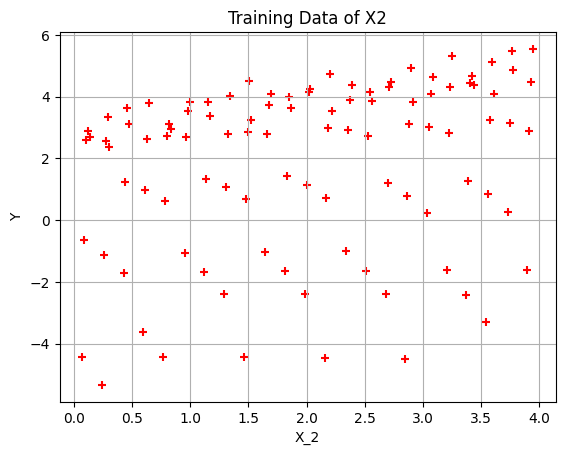

In [8]:
plt.scatter(X,Y, color='red', marker='+')
plt.grid()
plt.rcParams["figure.figsize"] = [7,7]
plt.xlabel('X_2')
plt.ylabel('Y')
plt.title('Training Data of X2')

In [9]:
# Reshape function to convert 1D array to 2D array (100x1)
m = len(X)
X_1 = X.reshape(m,1)
print("X_2 =", X_1[:5,:])

X_2 = [[3.44      ]
 [0.1349495 ]
 [0.82989899]
 [1.52484848]
 [2.21979798]]


In [10]:
# Create a single column of ones (X_0)
m = len(X)
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 100)

In [11]:
X = np.hstack((X_0, X_1))
X[:5]

array([[1.        , 3.44      ],
       [1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [12]:
theta = np.zeros((2,1))
theta

array([[0.],
       [0.]])

In [13]:
#Compute loss for linear regression for one time.
# Input Parameters
# X : 2D array for training example
#    m = number of training examples
#    n = number of features
# Y : 1D array of label/target values. Dimension: m
# theta : 2D array of fitting parameters. Dimension: n,1

# Output Parameters
# J : Loss

def compute_loss(X, Y, theta):
    predictions = X.dot(theta) #prediction = h
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)

    return J

In [14]:
# Compute the cost for theta values
cost = compute_loss(X, Y, theta)
print("The cost for given theta_0 and theta_2 =", cost)

The cost for given theta_0 and theta_2 = 552.4438459196241


In [15]:
#Compute loss for l inear regression for all iterations

#Input Parameters
#X: 2D array, Dimension: m x n
#    m = number of training data point
#    n = number of features
#Y: 1D array of labels/target value for each training data point. Dimension: m
#theta: 2D array of fitting parameters or weights. Dimension: (n,1)
#alpha : learning rate
#iterations: Number of iterations.

#Output Parameters
#theta: Final Value. 2D array of fitting parameters or weights. Dimension: n,1
#loss_history: Contains value of cost at each iteration. 1D Array. Dimension: m

def gradient_descent(X, Y, theta, alpha, iterations):
    loss_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta) # prediction (m,1) = temp
        errors = np.subtract(predictions, Y) # Error (m,1) = temp
        sum_delta = (alpha / m) * X.transpose().dot(errors); # sum_delta (n,1)
        theta = theta - sum_delta; # theta (n,1)
        loss_history[i] = compute_loss(X, Y, theta)
    return theta, loss_history

In [16]:
theta = [0., 0.]
iterations = 500
alpha = 0.004

In [17]:
theta, loss_history = gradient_descent(X, Y, theta, alpha, iterations)
print("Final value of theta =", theta)
print("loss_history =", loss_history)

Final value of theta = [0.44673177 0.67021365]
loss_history = [5.43227213 5.34457428 5.26112817 5.18172756 5.10617622 5.03428746
 4.9658836  4.90079563 4.83886269 4.77993177 4.72385723 4.67050055
 4.61972988 4.57141979 4.52545094 4.48170977 4.44008822 4.40048347
 4.36279772 4.32693787 4.29281537 4.26034595 4.22944942 4.2000495
 4.17207359 4.14545262 4.12012088 4.09601583 4.07307798 4.05125071
 4.03048016 4.01071507 3.99190667 3.97400857 3.95697661 3.94076878
 3.92534512 3.91066758 3.89669998 3.88340788 3.87075854 3.85872076
 3.84726489 3.83636271 3.82598736 3.81611329 3.8067162  3.79777294
 3.78926151 3.78116096 3.77345137 3.76611378 3.75913015 3.75248331
 3.74615692 3.74013546 3.73440412 3.72894885 3.72375625 3.71881358
 3.71410873 3.70963017 3.70536692 3.70130853 3.69744509 3.69376713
 3.69026565 3.68693212 3.68375837 3.68073667 3.67785964 3.67512026
 3.67251187 3.67002812 3.66766295 3.66541063 3.66326568 3.6612229
 3.65927733 3.65742427 3.65565922 3.65397793 3.65237633 3.65085056
 3

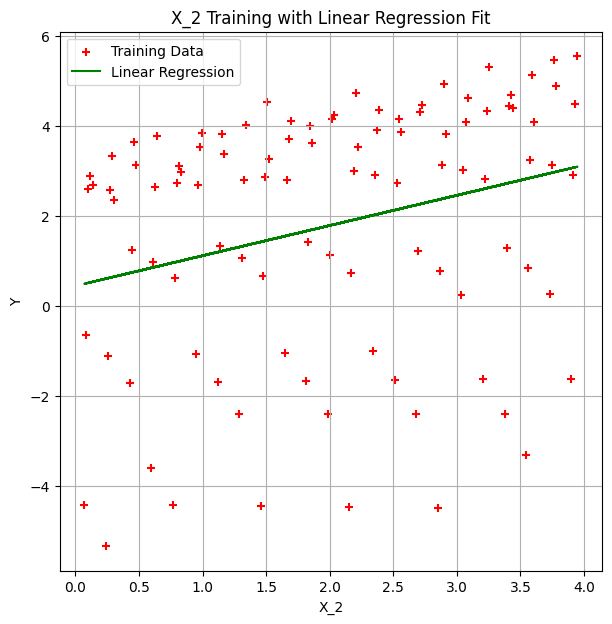

In [18]:
# Graphing linear regression with training data points
plt.scatter(X[:,1], Y, color='red', marker='+', label= 'Training Data')
plt.plot(X[:,1], X.dot(theta), color='green', label= 'Linear Regression')
plt.rcParams["figure.figsize"] = [12,8]
plt.grid()
plt.xlabel("X_2")
plt.ylabel("Y")
plt.title("X_2 Training with Linear Regression Fit")
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent of X2')

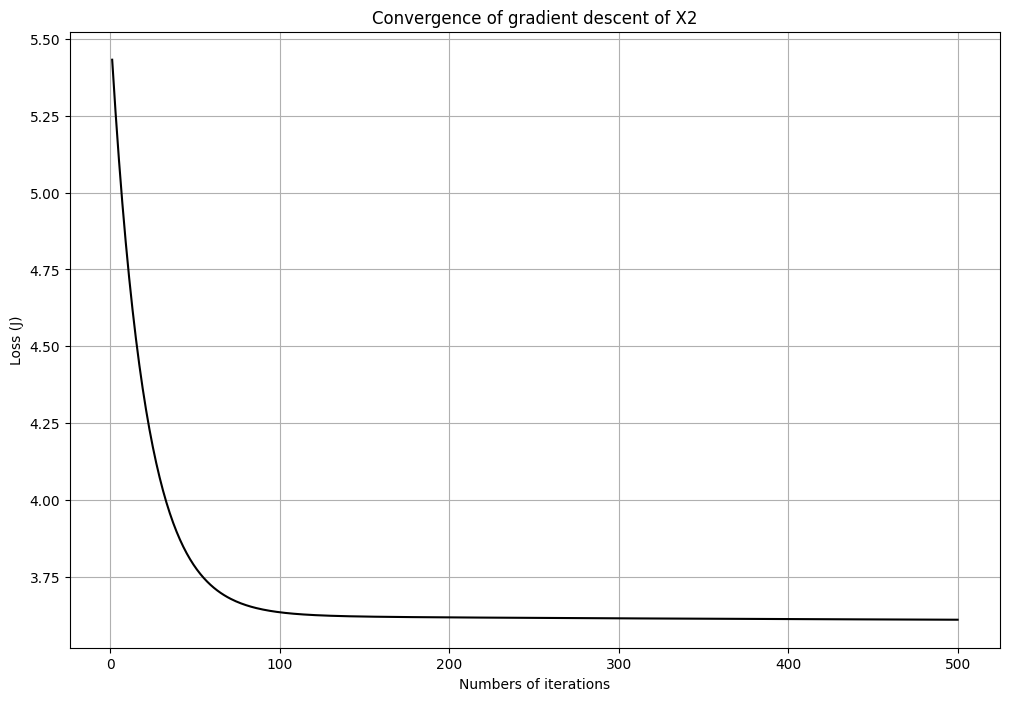

In [19]:
plt.plot(range(1, iterations + 1), loss_history, color = 'black')
plt.rcParams["figure.figsize"] = [12,8]
plt.grid()
plt.xlabel("Numbers of iterations")
plt.ylabel("Loss (J)")
plt.title("Convergence of gradient descent of X2")

# Fin